Requirements
1. A Fruits dataset is provided for this project, and it has images of (1) apples, (2)
oranges, (3) bananas and (4) a mix of apples, oranges and bananas.
2. Your task is to implement a CNN to recognize the 4 classes accurately.
3. Use the images in the “train” folder to train your image classifier.
4. Then, test the accuracy of your image classifier using images from the “test”
folder.
5. Document all your experiments and results. For example, what was done to
increase the accuracy of your image classifier (e.g. image augmentation).
6. Use Matplotlib to produce any plots that help the reader understand your
work better.

## Preprocessing of data

### Importing all libraries

In [1]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import os

### Loop through images to get the idea of the sizes of the images

In [2]:
width_array = []
height_array = []
img_path_train = "train/"

for filename in os.listdir(img_path_train):
    if filename.endswith(".jpg"):
        img = Image.open(img_path_train + filename)
        img_rgb = img.convert('RGB')
        np_img_rgb = np.array(img_rgb)
        width = np_img_rgb.shape[0]
        height = np_img_rgb.shape[1]
        width_array.append(width)
        height_array.append(height)

np_width_array = np.array(width_array)
np_height_array = np.array(height_array)

print(np.median(np_width_array))
print(np.median(np_height_array))
print(np.min(np_width_array))
print(np.min(np_height_array))

/Users/weiyang/opt/anaconda3/envs/pythonEx/lib/python3.9/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


500.0
640.0
160
166


In [3]:
width_array_test = []
height_array_test = []
img_path_test = "test/"

for filename in os.listdir(img_path_test):
    if filename.endswith(".jpg"):
        img = Image.open(img_path_test + filename)
        img_rgb = img.convert('RGB')
        np_img_rgb = np.array(img_rgb)
        width = np_img_rgb.shape[0]
        height = np_img_rgb.shape[1]
        width_array_test.append(width)
        height_array_test.append(height)

np_width_array_test = np.array(width_array_test)
np_height_array_test = np.array(height_array_test)

print(np.median(np_width_array_test))
print(np.median(np_height_array_test))
print(np.min(np_width_array_test))
print(np.min(np_height_array_test))

500.0
650.0
188
282


### Clearer view of sizes using histogram

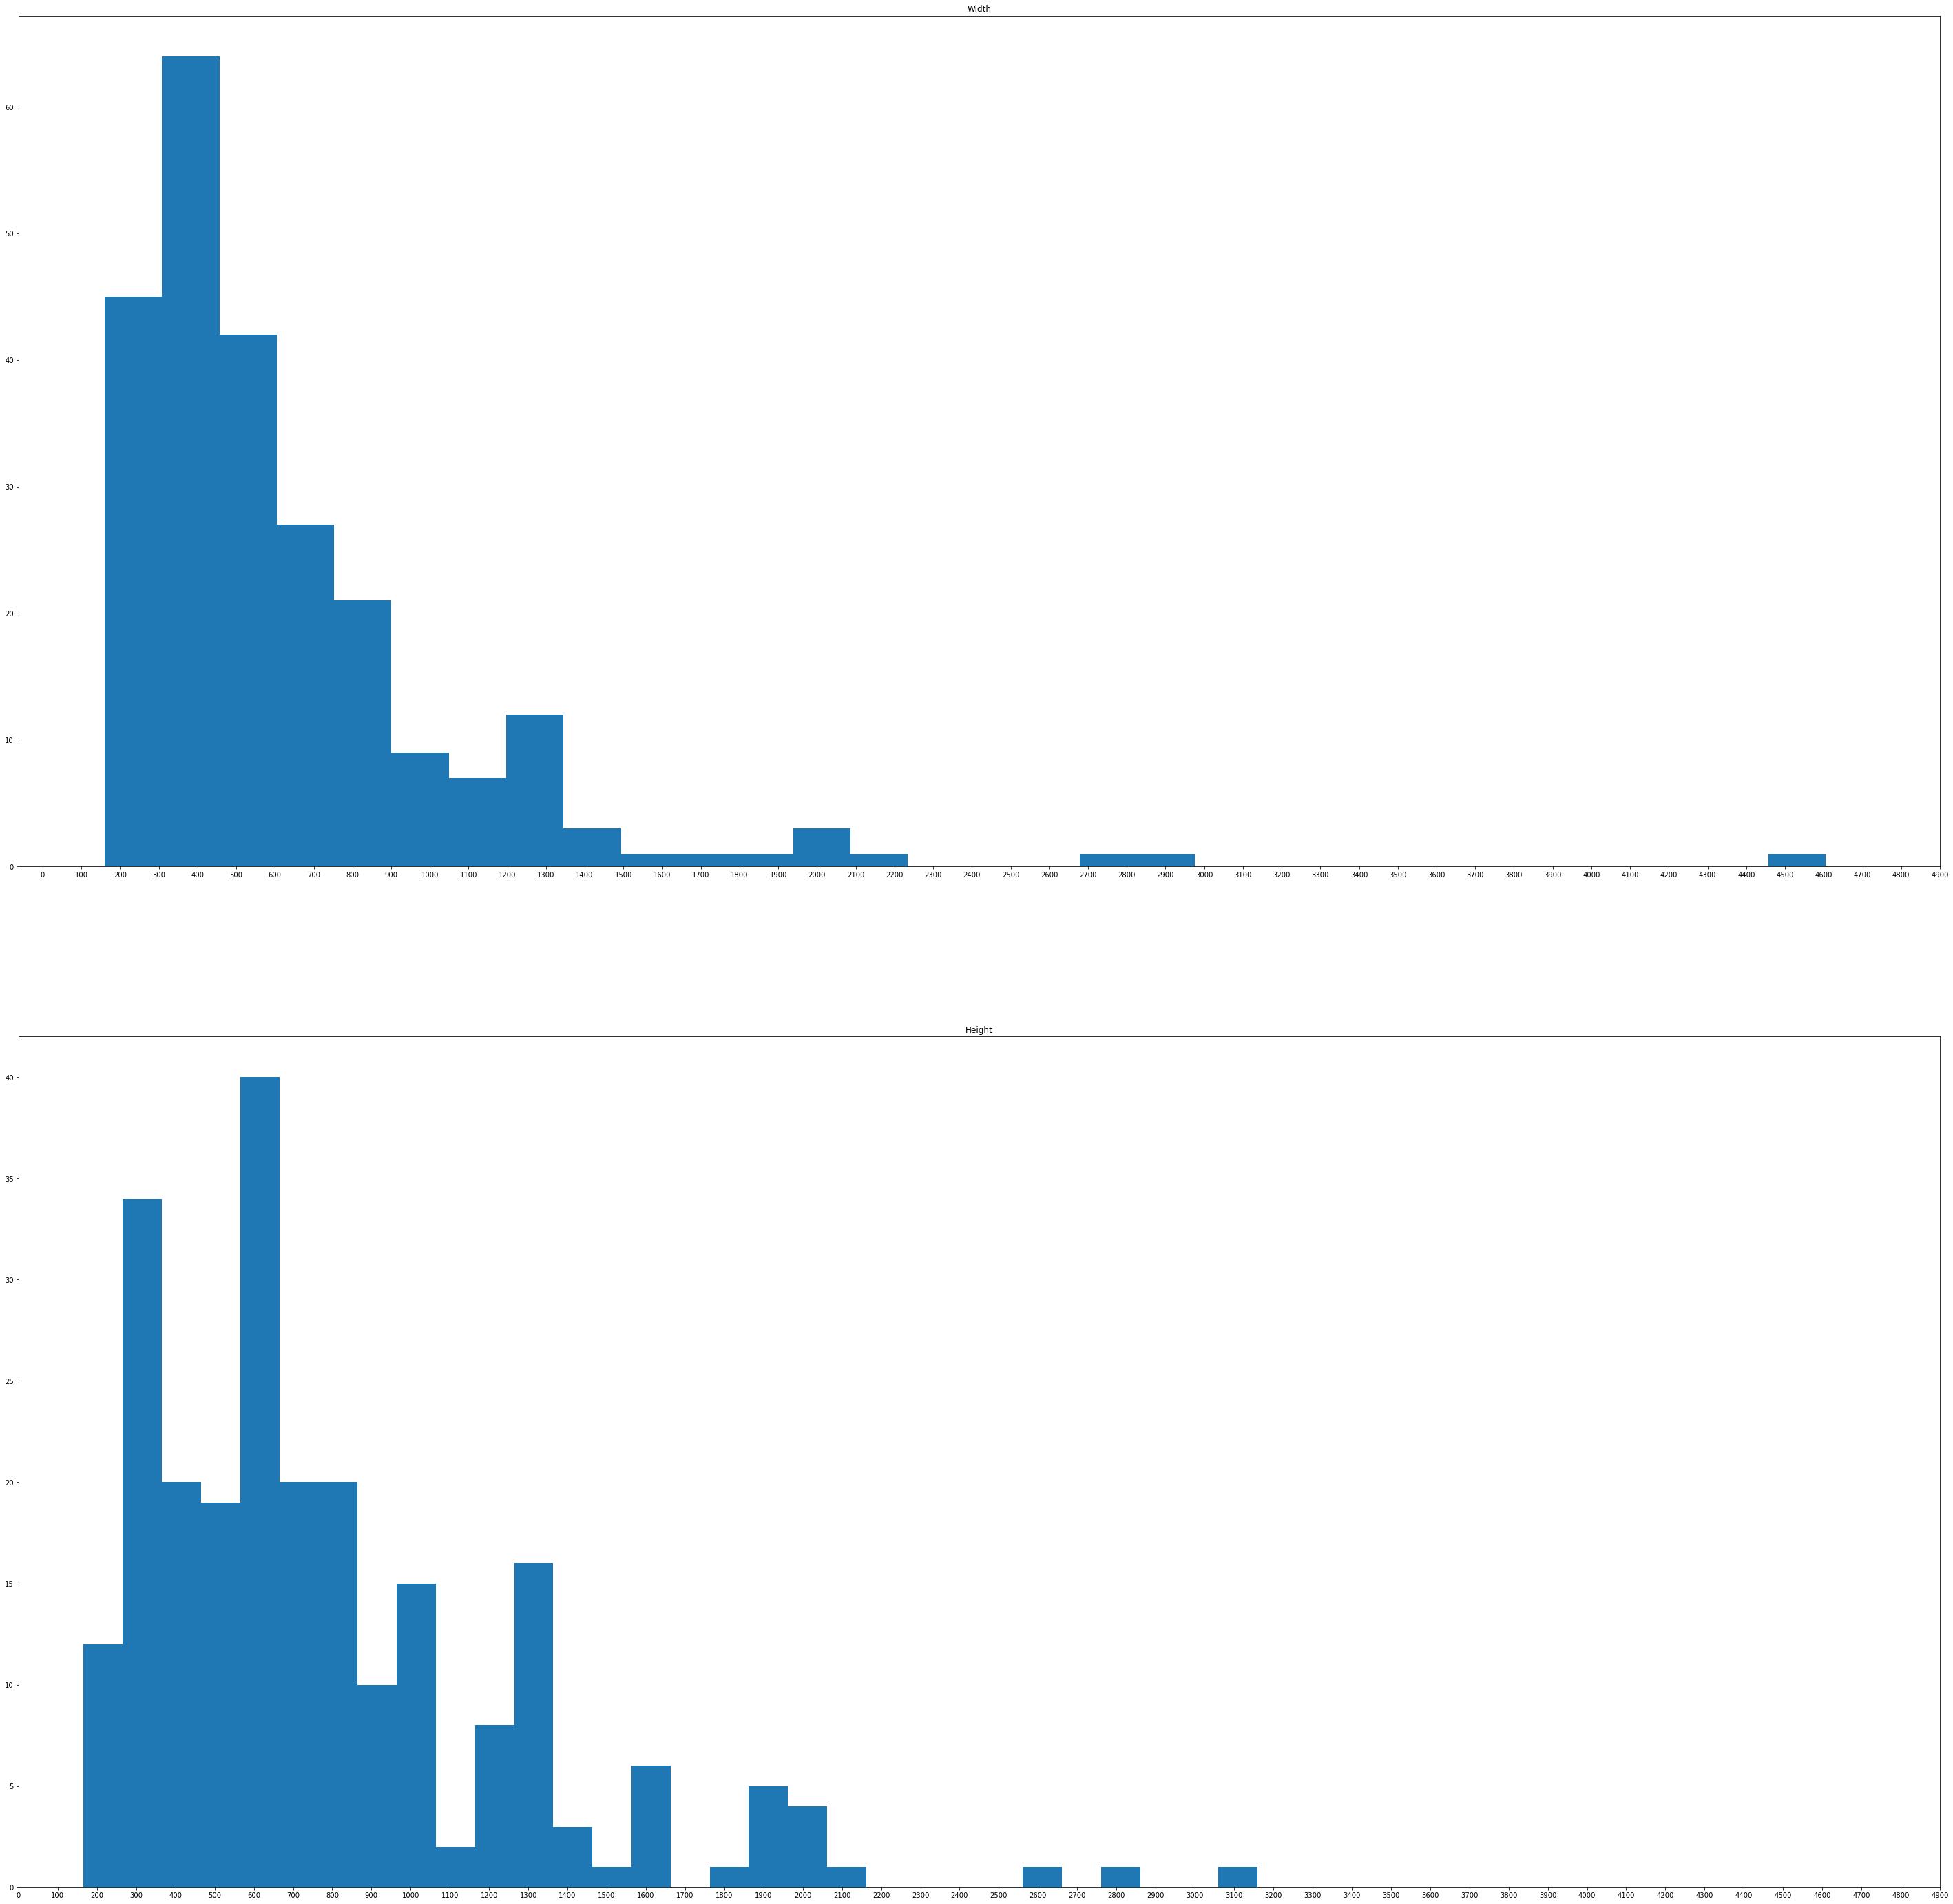

In [4]:
fig, ax = plt.subplots(2,1, figsize = (50,50))

ax[0].hist(np_width_array, bins = 30)
ax[0].set_title('Width')
ax[0].set_xticks(np.arange(0,5000,100))
ax[1].hist(np_height_array, bins = 30)
ax[1].set_title('Height')
ax[1].set_xticks(np.arange(0,5000,100))

### Image processing

### Creating of x_train and y_train data

In [5]:
x_train = None
y_train_raw = []
img_path_train = "train/"

for filename in os.listdir(img_path_train):
    if filename.endswith(".jpg"):
        img = Image.open(img_path_train + filename)
        img_rgb = img.convert('RGB') # Converts all images to RGB
        img_rgb_resized = img_rgb.resize((160,160)) # Resizes all images to 160 x 160 (Based on smallest image size)
        np_img_rgb_resized = np.array(img_rgb_resized) 
        np_img_rgb_resized_normed = np_img_rgb_resized/255 # Normalization

    # Creating y_train dataset
        if filename.startswith("apple"):
            y_train_raw.append(0)
        elif filename.startswith("banana"):
            y_train_raw.append(1)
        elif filename.startswith("mixed"):
            y_train_raw.append(3)
        elif filename.startswith("orange"):
            y_train_raw.append(2)

    # Creating x_train dataset
        if x_train is None:
            x_train = np_img_rgb_resized_normed

        else:
            x_train = np.concatenate((x_train, np_img_rgb_resized_normed))

x_train = x_train.reshape(-1,160,160, 3) # Reshaping x_train dataset to fit then tensorflow model
np_y_train_raw = np.array(y_train_raw) 

### Checking of x_train and y_train 

0


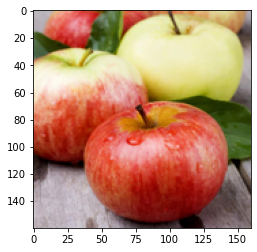

In [6]:
plt.imshow(x_train[40])
print(y_train_raw[40])

In [7]:
print(x_train)
x_train.shape


[[[[0.15294118 0.39215686 0.13333333]
   [0.10588235 0.36078431 0.09411765]
   [0.08627451 0.34901961 0.09411765]
   ...
   [0.80392157 0.91372549 0.58039216]
   [0.82352941 0.92941176 0.6       ]
   [0.82352941 0.92941176 0.6       ]]

  [[0.12941176 0.37647059 0.11372549]
   [0.08627451 0.34901961 0.08627451]
   [0.08235294 0.34901961 0.08627451]
   ...
   [0.81960784 0.92156863 0.59215686]
   [0.83529412 0.92941176 0.60784314]
   [0.84313725 0.94117647 0.61176471]]

  [[0.14117647 0.38039216 0.10588235]
   [0.08627451 0.34901961 0.07843137]
   [0.08235294 0.35686275 0.08235294]
   ...
   [0.82745098 0.92941176 0.60392157]
   [0.84313725 0.94117647 0.61568627]
   [0.84705882 0.94509804 0.61568627]]

  ...

  [[0.57647059 0.65098039 0.43529412]
   [0.58431373 0.65490196 0.43137255]
   [0.54901961 0.64313725 0.38039216]
   ...
   [0.68627451 0.82745098 0.49803922]
   [0.6627451  0.80784314 0.47843137]
   [0.6745098  0.80784314 0.49803922]]

  [[0.62745098 0.67058824 0.4627451 ]
   [0.6

(240, 160, 160, 3)

In [8]:
for filename in os.listdir(img_path_train):
    if filename.endswith(".jpg"):
        print(filename)

apple_75.jpg
apple_61.jpg
apple_49.jpg
orange_3.jpg
orange_28.jpg
banana_50.jpg
orange_14.jpg
banana_44.jpg
banana_45.jpg
orange_15.jpg
banana_51.jpg
orange_29.jpg
orange_2.jpg
apple_48.jpg
apple_60.jpg
apple_74.jpg
apple_62.jpg
apple_76.jpg
banana_47.jpg
banana_53.jpg
orange_17.jpg
orange_16.jpg
banana_52.jpg
banana_46.jpg
orange_1.jpg
apple_63.jpg
apple_67.jpg
apple_73.jpg
orange_5.jpg
apple_8.jpg
banana_42.jpg
orange_12.jpg
banana_56.jpg
banana_57.jpg
orange_13.jpg
banana_43.jpg
apple_9.jpg
orange_4.jpg
apple_72.jpg
apple_66.jpg
apple_58.jpg
apple_70.jpg
apple_64.jpg
orange_6.jpg
orange_11.jpg
banana_55.jpg
banana_41.jpg
banana_69.jpg
orange_38.jpg
banana_68.jpg
banana_40.jpg
banana_54.jpg
orange_10.jpg
orange_7.jpg
apple_65.jpg
apple_71.jpg
apple_59.jpg
apple_16.jpg
mixed_6.jpg
banana_33.jpg
banana_27.jpg
orange_63.jpg
orange_62.jpg
banana_26.jpg
orange_76.jpg
banana_32.jpg
mixed_7.jpg
apple_17.jpg
banana_9.jpg
apple_15.jpg
apple_29.jpg
mixed_20.jpg
mixed_5.jpg
orange_48.jpg
banana

In [9]:
print(y_train_raw)
# 0 = apple
# 1 = banana
# 2 = orange
# 3 = mixed

[0, 0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 0, 0, 2, 0, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 3, 1, 1, 2, 2, 1, 2, 1, 3, 0, 1, 0, 0, 3, 3, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 3, 0, 0, 1, 0, 0, 3, 1, 2, 1, 2, 2, 1, 2, 1, 2, 3, 3, 0, 0, 0, 3, 2, 1, 1, 1, 2, 1, 2, 3, 0, 0, 0, 1, 3, 1, 2, 2, 2, 2, 1, 3, 1, 0, 0, 0, 3, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 3, 1, 0, 0, 0, 1, 0, 0, 3, 3, 2, 2, 1, 1, 1, 2, 3, 3, 0, 0, 1, 0, 1, 0, 0, 3, 2, 1, 2, 2, 1, 2, 3, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 2, 1, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0, 0, 0]


### Creating x_test and y_test

In [10]:
x_test = None
y_test_raw = []
img_path_test = "test/"

for filename in os.listdir(img_path_test):
    if filename.endswith(".jpg"):
        img = Image.open(img_path_test + filename)
        img_rgb = img.convert('RGB')
        img_rgb_resized = img_rgb.resize((160,160))
        np_img_rgb_resized = np.array(img_rgb_resized)
        np_img_rgb_resized_normed = np_img_rgb_resized/255

        if filename.startswith("apple"):
            y_test_raw.append(0)
        elif filename.startswith("banana"):
            y_test_raw.append(1)
        elif filename.startswith("mixed"):
            y_test_raw.append(3)
        elif filename.startswith("orange"):
            y_test_raw.append(2)


        if x_test is None:
            x_test = np_img_rgb_resized_normed

        else:
            x_test = np.concatenate((x_test, np_img_rgb_resized_normed))

x_test = x_test.reshape(-1,160,160, 3)
np_y_test_raw = np.array(y_test_raw)

### Checking x_test and y_test data

0


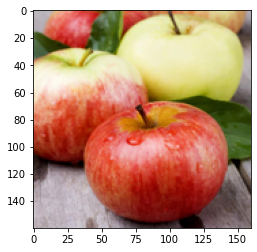

In [11]:
plt.imshow(x_train[40])
print(y_train_raw[40])

In [12]:
print(x_train)
x_train.shape

[[[[0.15294118 0.39215686 0.13333333]
   [0.10588235 0.36078431 0.09411765]
   [0.08627451 0.34901961 0.09411765]
   ...
   [0.80392157 0.91372549 0.58039216]
   [0.82352941 0.92941176 0.6       ]
   [0.82352941 0.92941176 0.6       ]]

  [[0.12941176 0.37647059 0.11372549]
   [0.08627451 0.34901961 0.08627451]
   [0.08235294 0.34901961 0.08627451]
   ...
   [0.81960784 0.92156863 0.59215686]
   [0.83529412 0.92941176 0.60784314]
   [0.84313725 0.94117647 0.61176471]]

  [[0.14117647 0.38039216 0.10588235]
   [0.08627451 0.34901961 0.07843137]
   [0.08235294 0.35686275 0.08235294]
   ...
   [0.82745098 0.92941176 0.60392157]
   [0.84313725 0.94117647 0.61568627]
   [0.84705882 0.94509804 0.61568627]]

  ...

  [[0.57647059 0.65098039 0.43529412]
   [0.58431373 0.65490196 0.43137255]
   [0.54901961 0.64313725 0.38039216]
   ...
   [0.68627451 0.82745098 0.49803922]
   [0.6627451  0.80784314 0.47843137]
   [0.6745098  0.80784314 0.49803922]]

  [[0.62745098 0.67058824 0.4627451 ]
   [0.6

(240, 160, 160, 3)

In [13]:
for filename in os.listdir(img_path_test):
    if filename.endswith(".jpg"):
        print(filename)

banana_78.jpg
banana_93.jpg
banana_87.jpg
banana_86.jpg
banana_92.jpg
banana_79.jpg
apple_89.jpg
banana_84.jpg
banana_90.jpg
banana_91.jpg
banana_85.jpg
apple_77.jpg
apple_88.jpg
banana_81.jpg
banana_94.jpg
banana_80.jpg
banana_82.jpg
banana_83.jpg
mixed_23.jpg
orange_77.jpg
orange_89.jpg
mixed_22.jpg
mixed_21.jpg
mixed_25.jpg
mixed_24.jpg
orange_95.jpg
orange_81.jpg
orange_80.jpg
orange_94.jpg
orange_82.jpg
orange_83.jpg
orange_78.jpg
orange_87.jpg
orange_93.jpg
orange_92.jpg
orange_86.jpg
orange_79.jpg
orange_90.jpg
orange_84.jpg
orange_85.jpg
orange_91.jpg
apple_83.jpg
apple_82.jpg
apple_80.jpg
apple_94.jpg
apple_95.jpg
apple_81.jpg
apple_85.jpg
apple_91.jpg
banana_77.jpg
banana_88.jpg
banana_89.jpg
apple_90.jpg
apple_84.jpg
apple_92.jpg
apple_86.jpg
apple_79.jpg
apple_78.jpg
apple_87.jpg
apple_93.jpg


In [14]:
print(np_y_test_raw)
np_y_test_raw.shape

[1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 3 2 2 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]


(60,)

### Converting to categorical data

In [15]:
labels = np.unique(y_test_raw)
labels

array([0, 1, 2, 3])

In [16]:
n_labels = len(labels)
n_labels

4

In [17]:
y_train_1hot = tf.keras.utils.to_categorical(np_y_train_raw, n_labels)
y_test_1hot = tf.keras.utils.to_categorical(np_y_test_raw, n_labels)

In [18]:
y_train_1hot

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],


In [19]:
y_train_1hot

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],


### CNN model

Base model
- 2 Conv layers
- 2 Max pooling layers
- 1 Flatten layer
- 1 Dense layer

Will be testing different kernel sizes for 1st conv layer : 3x3, 5x5, 7x7

In [20]:
model1 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (160,160,3)),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
        tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units = 4, activation = 'softmax')
    ])

2021-11-28 05:35:39.756378: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy'])

In [22]:
hist = model1.fit(x=x_train, y=y_train_1hot, batch_size=32, epochs=15)

Epoch 1/15
8/8 [==============================] - 4s 508ms/step - loss: 2.8377 - accuracy: 0.2792
Epoch 2/15
8/8 [==============================] - 4s 528ms/step - loss: 1.3074 - accuracy: 0.4333
Epoch 3/15
8/8 [==============================] - 4s 477ms/step - loss: 1.0299 - accuracy: 0.6333
Epoch 4/15
8/8 [==============================] - 4s 475ms/step - loss: 0.6419 - accuracy: 0.7833
Epoch 5/15
8/8 [==============================] - 4s 471ms/step - loss: 0.3510 - accuracy: 0.8708
Epoch 6/15
8/8 [==============================] - 4s 464ms/step - loss: 0.2144 - accuracy: 0.9250
Epoch 7/15
8/8 [==============================] - 4s 464ms/step - loss: 0.2110 - accuracy: 0.9333
Epoch 8/15
8/8 [==============================] - 4s 465ms/step - loss: 0.1397 - accuracy: 0.9708
Epoch 9/15
8/8 [==============================] - 4s 479ms/step - loss: 0.0909 - accuracy: 0.9708
Epoch 10/15
8/8 [==============================] - 4s 488ms/step - loss: 0.0659 - accuracy: 0.9750
Epoch 11/15
8/8 [==

In [23]:
loss, accuracy = model1.evaluate(x=x_test, y=y_test_1hot)

print('loss =', loss)
print('accuracy =', accuracy)

2/2 [==============================] - 0s 120ms/step - loss: 0.7984 - accuracy: 0.8833
loss = 0.7983956933021545
accuracy = 0.8833333253860474


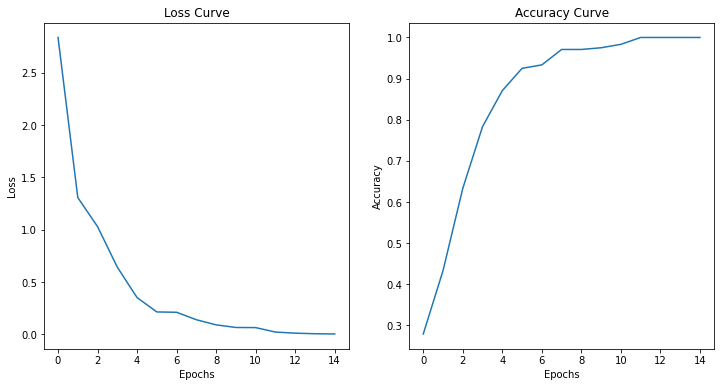

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(hist.history['loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curve')

ax[1].plot(hist.history['accuracy'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curve')

plt.show()

### Results

#### kernel size 3x3 :
 - first Run : loss: 0.7321 - accuracy: 0.8667
 - second Run : loss: 0.8448 - accuracy: 0.8667
 - third Run : loss: 0.7805 - accuracy: 0.8667

#### kernel size 5x5 :
 - first Run : loss: 0.6682 - accuracy: 0.8500
 - second Run : loss: 0.6418 - accuracy: 0.8500
 - third Run : loss: 0.7372 - accuracy: 0.8667

#### Kernel size 7x7 :
 - first Run : loss: 0.9153 - accuracy: 0.8667
 - second Run : loss: 0.7905 - accuracy: 0.8667
 - third Run : loss: 0.9256 - accuracy: 0.8500

### Evaluation

3x3 kernel yields the highest accuracy while 5x5 kernel yields the lowest losses

3x3 kernel will be used to evaluate the other models

We will then proceed to test different filter numbers of 32,64,96 and 128

### Results

#### filter number 32: 
 - first Run : loss: 0.7321 - accuracy: 0.8667
 - second Run : loss: 0.8448 - accuracy: 0.8667
 - third Run : loss: 0.7805 - accuracy: 0.8667

#### filter number 64:
 - first Run : loss: 0.6591 - accuracy: 0.8833
 - second Run : loss: 0.8601 - accuracy: 0.8833
 - third Run : loss: 0.6653 - accuracy: 0.8833


#### filter number 96:
 - first Run : loss: 0.9510 - accuracy: 0.8667
 - second Run : loss: 0.7423 - accuracy: 0.8833
 - third Run : loss: 0.8194 - accuracy: 0.8833


#### filter number 128:
 - first Run : loss: 0.8262 - accuracy: 0.8833
 - second Run : loss: 1.0673 - accuracy: 0.8500
 - third Run : loss: 0.8348 - accuracy: 0.8833


### Evaluation

After evaluating 4 different filter numbers,

filter number of 64 increased the accuracy from 0.8667 to 0.8833, as well as reducing the loss

### Modifying base model with additional dense layer

Dense layer will be tested with parameter of 256, 512 and 1024 units

In [25]:
model2 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (160,160,3)),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
        tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units = 1024, activation = 'relu'),
        tf.keras.layers.Dense(units = 4, activation = 'softmax')
    ])

In [26]:
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy'])

In [27]:
hist2 = model2.fit(x=x_train, y=y_train_1hot, batch_size=32, epochs=15)

Epoch 1/15
8/8 [==============================] - 9s 957ms/step - loss: 9.8326 - accuracy: 0.3250
Epoch 2/15
8/8 [==============================] - 7s 875ms/step - loss: 1.0772 - accuracy: 0.6292
Epoch 3/15
8/8 [==============================] - 7s 886ms/step - loss: 0.6682 - accuracy: 0.7583
Epoch 4/15
8/8 [==============================] - 7s 895ms/step - loss: 0.4363 - accuracy: 0.8292
Epoch 5/15
8/8 [==============================] - 7s 912ms/step - loss: 0.2558 - accuracy: 0.9208
Epoch 6/15
8/8 [==============================] - 7s 897ms/step - loss: 0.1627 - accuracy: 0.9542
Epoch 7/15
8/8 [==============================] - 7s 902ms/step - loss: 0.0876 - accuracy: 0.9625
Epoch 8/15
8/8 [==============================] - 8s 942ms/step - loss: 0.0387 - accuracy: 0.9917
Epoch 9/15
8/8 [==============================] - 8s 948ms/step - loss: 0.0729 - accuracy: 0.9792
Epoch 10/15
8/8 [==============================] - 7s 907ms/step - loss: 0.0275 - accuracy: 0.9917
Epoch 11/15
8/8 [==

In [28]:
loss2, accuracy2 = model2.evaluate(x=x_test, y=y_test_1hot)

print('loss =', loss2)
print('accuracy =', accuracy2)

2/2 [==============================] - 0s 153ms/step - loss: 0.7358 - accuracy: 0.8333
loss = 0.7357744574546814
accuracy = 0.8333333134651184


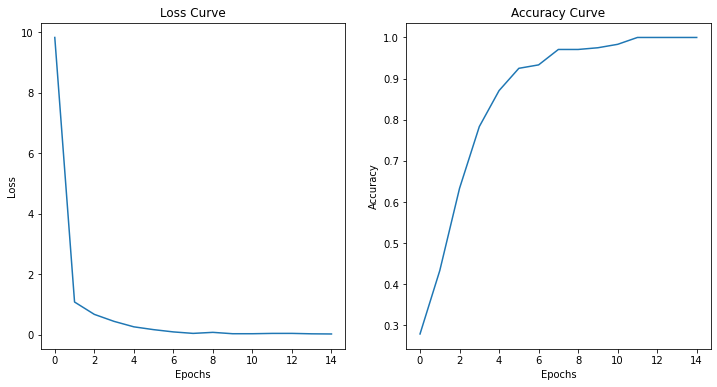

In [29]:
fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax2[0].plot(hist2.history['loss'])
ax2[0].set_xlabel('Epochs')
ax2[0].set_ylabel('Loss')
ax2[0].set_title('Loss Curve')

ax2[1].plot(hist.history['accuracy'])
ax2[1].set_xlabel('Epochs')
ax2[1].set_ylabel('Accuracy')
ax2[1].set_title('Accuracy Curve')

plt.show()

### Results

#### Dense layer unit = 256:
- Run 1 : loss: 0.9580 - accuracy: 0.8667
- Run 2 : loss: 1.0953 - accuracy: 0.8500
- Run 3 : loss: 0.7664 - accuracy: 0.8667

#### Dense layer unit = 512:
- Run 1 : loss: 0.7808 - accuracy: 0.8667
- Run 2 : loss: 0.9074 - accuracy: 0.8500
- Run 3 : loss: 0.8856 - accuracy: 0.8833

#### Dense layer unit = 1024:
- Run 1 : loss: 1.2255 - accuracy: 0.8000
- Run 2 : loss: 0.7518 - accuracy: 0.8333
- Run 3 : loss: 0.8095 - accuracy: 0.8667

### Evaluation

Adding a dense layer does not improve the accuracy

### L2 regularization

Values to test : 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05

In [30]:
model3 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (160,160,3), kernel_regularizer = tf.keras.regularizers.L2(0.00005)),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
        #tf.keras.layers.Dropout(rate = 0.25),
        tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', kernel_regularizer = tf.keras.regularizers.L2(0.00005)),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units = 4, activation = 'softmax')
    ])

In [31]:
model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy'])

In [32]:
hist3 = model3.fit(x=x_train, y=y_train_1hot, batch_size=32, epochs=15)

Epoch 1/15
8/8 [==============================] - 5s 517ms/step - loss: 1.8395 - accuracy: 0.4208
Epoch 2/15
8/8 [==============================] - 4s 523ms/step - loss: 0.9828 - accuracy: 0.5792
Epoch 3/15
8/8 [==============================] - 4s 518ms/step - loss: 0.5726 - accuracy: 0.8208
Epoch 4/15
8/8 [==============================] - 4s 540ms/step - loss: 0.3108 - accuracy: 0.9208
Epoch 5/15
8/8 [==============================] - 4s 533ms/step - loss: 0.2258 - accuracy: 0.9167
Epoch 6/15
8/8 [==============================] - 4s 543ms/step - loss: 0.1315 - accuracy: 0.9667
Epoch 7/15
8/8 [==============================] - 4s 525ms/step - loss: 0.1089 - accuracy: 0.9792
Epoch 8/15
8/8 [==============================] - 4s 551ms/step - loss: 0.0863 - accuracy: 0.9750
Epoch 9/15
8/8 [==============================] - 4s 530ms/step - loss: 0.0522 - accuracy: 0.9917
Epoch 10/15
8/8 [==============================] - 4s 539ms/step - loss: 0.0289 - accuracy: 1.0000
Epoch 11/15
8/8 [==

In [33]:
loss3, accuracy3 = model3.evaluate(x=x_test, y=y_test_1hot)

print('loss =', loss3)
print('accuracy =', accuracy3)

2/2 [==============================] - 0s 147ms/step - loss: 0.9333 - accuracy: 0.8667
loss = 0.9333161115646362
accuracy = 0.8666666746139526


Text(0.5, 1.0, 'Accuracy Curve')

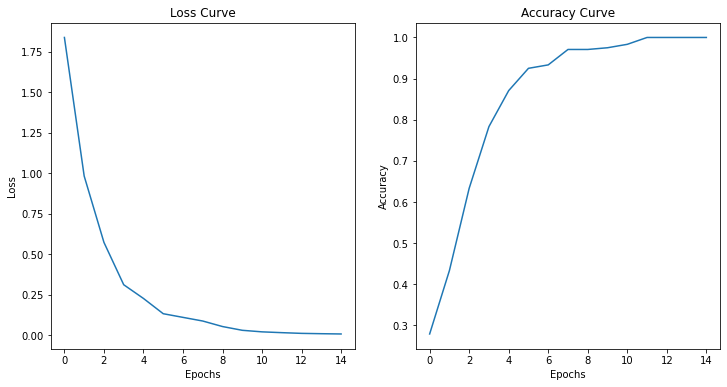

In [34]:
fig3, ax3 = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax3[0].plot(hist3.history['loss'])
ax3[0].set_xlabel('Epochs')
ax3[0].set_ylabel('Loss')
ax3[0].set_title('Loss Curve')

ax3[1].plot(hist.history['accuracy'])
ax3[1].set_xlabel('Epochs')
ax3[1].set_ylabel('Accuracy')
ax3[1].set_title('Accuracy Curve')

### Results

#### L2 Regularization : 0.00001
- loss: 0.6351 - accuracy: 0.8500

#### L2 Regularization : 0.00005
- loss: 0.9448 - accuracy: 0.8500

#### L2 Regularization : 0.0001
- loss: 0.8235 - accuracy: 0.8667

#### L2 Regularization : 0.0005
- loss: 0.8136 - accuracy: 0.8667

#### L2 Regularization : 0.001
- loss: 0.8303 - accuracy: 0.8833

#### L2 Regularization : 0.005
- loss: 0.8620 - accuracy: 0.8833

#### L2 Regularization : 0.01
- loss: 0.9334 - accuracy: 0.8833

#### L2 Regularization : 0.05
- loss: 1.3680 - accuracy: 0.8833

#### L2 Regularization : 0.1
- loss: 1.4527 - accuracy: 0.8500

### Evaluation

L2 Regularization does not help in improving the accuracy or loss

### Dropout

Values to test : 0.1, 0.2, 0.3, 0.4, 0.5

In [35]:
model4 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (160,160,3)),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
        tf.keras.layers.Dropout(rate = 0.4),
        tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units = 4, activation = 'softmax')
    ])

In [36]:
model4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy'])

In [37]:
hist4 = model4.fit(x=x_train, y=y_train_1hot, batch_size=32, epochs=15)

Epoch 1/15
8/8 [==============================] - 6s 652ms/step - loss: 4.2276 - accuracy: 0.3542
Epoch 2/15
8/8 [==============================] - 5s 675ms/step - loss: 1.3462 - accuracy: 0.3333
Epoch 3/15
8/8 [==============================] - 5s 652ms/step - loss: 1.0563 - accuracy: 0.4917
Epoch 4/15
8/8 [==============================] - 5s 653ms/step - loss: 0.7508 - accuracy: 0.7792
Epoch 5/15
8/8 [==============================] - 5s 645ms/step - loss: 0.5907 - accuracy: 0.7875
Epoch 6/15
8/8 [==============================] - 5s 682ms/step - loss: 0.4503 - accuracy: 0.8458
Epoch 7/15
8/8 [==============================] - 5s 641ms/step - loss: 0.3713 - accuracy: 0.8833
Epoch 8/15
8/8 [==============================] - 5s 667ms/step - loss: 0.3060 - accuracy: 0.9042
Epoch 9/15
8/8 [==============================] - 5s 669ms/step - loss: 0.2887 - accuracy: 0.9000
Epoch 10/15
8/8 [==============================] - 5s 638ms/step - loss: 0.2126 - accuracy: 0.9417
Epoch 11/15
8/8 [==

In [38]:
loss4, accuracy4 = model4.evaluate(x=x_test, y=y_test_1hot)

print('loss =', loss4)
print('accuracy =', accuracy4)

2/2 [==============================] - 0s 149ms/step - loss: 0.5754 - accuracy: 0.9167
loss = 0.5753742456436157
accuracy = 0.9166666865348816


Text(0.5, 1.0, 'Accuracy Curve')

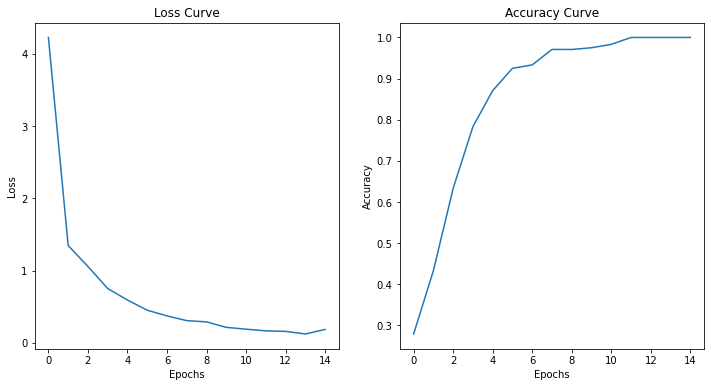

In [39]:
fig4, ax4 = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax4[0].plot(hist4.history['loss'])
ax4[0].set_xlabel('Epochs')
ax4[0].set_ylabel('Loss')
ax4[0].set_title('Loss Curve')

ax4[1].plot(hist.history['accuracy'])
ax4[1].set_xlabel('Epochs')
ax4[1].set_ylabel('Accuracy')
ax4[1].set_title('Accuracy Curve')

### Results

#### Dropout rate = 0.1 :
- loss: 0.5492 - accuracy: 0.8833

#### Dropout rate = 0.2 :
- loss: 0.7456 - accuracy: 0.8667

#### Dropout rate = 0.3 :
- loss: 0.5776 - accuracy: 0.9000

#### Dropout rate = 0.4 :
- run 1 : loss: 0.4199 - accuracy: 0.9000
- run 2 : loss: 0.5754 - accuracy: 0.9167

#### Dropout rate = 0.5 :
- loss: 0.6506 - accuracy: 0.8833

### Evaluation

Dropout rate of 0.4 increase the accuracy and reduced the loss

### Conclusion

Our base model yields an accuracy of 88.83%. By applying the dropout layer with the rate of 0.4, the accuracy is further increased for 91.67%.